In [35]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
#my tiingo api_key
key = '303ab54719a6a63dd1e57c36916695053da99b86'

df = pdr.get_data_tiingo('MSFT',api_key = key)

C:\Users\kanka\AppData\Local\Temp\ipykernel_18004\680247138.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('MSFT',api_key = key)


In [14]:
df.to_csv('MSFT.csv')
df = pd.read_csv('MSFT.csv')

In [15]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2018-06-14 00:00:00+00:00,101.42,102.03,101.00,101.65,25691811,95.893443,96.470203,95.496330,96.110910,25691811,0.0,1.0
1,MSFT,2018-06-15 00:00:00+00:00,100.13,101.53,100.07,101.51,65738585,94.673737,95.997449,94.617007,95.978539,65738585,0.0,1.0
2,MSFT,2018-06-18 00:00:00+00:00,100.86,101.11,99.42,100.01,23586037,95.363958,95.600336,94.002427,94.560276,23586037,0.0,1.0
3,MSFT,2018-06-19 00:00:00+00:00,100.86,101.00,99.50,99.65,28653087,95.363958,95.496330,94.078067,94.219894,28653087,0.0,1.0
4,MSFT,2018-06-20 00:00:00+00:00,101.87,102.52,101.12,101.37,26180792,96.318922,96.933502,95.609791,95.846168,26180792,0.0,1.0


In [16]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,MSFT,2023-06-06 00:00:00+00:00,333.68,335.3700,332.17,335.330,20396223,333.68,335.3700,332.17,335.330,20396223,0.0,1.0
1253,MSFT,2023-06-07 00:00:00+00:00,323.38,334.4900,322.50,331.650,40717129,323.38,334.4900,322.50,331.650,40717129,0.0,1.0
1254,MSFT,2023-06-08 00:00:00+00:00,325.26,326.6400,323.35,323.935,23277708,325.26,326.6400,323.35,323.935,23277708,0.0,1.0
1255,MSFT,2023-06-09 00:00:00+00:00,326.79,329.9900,324.41,324.990,22528950,326.79,329.9900,324.41,324.990,22528950,0.0,1.0
1256,MSFT,2023-06-12 00:00:00+00:00,331.85,332.0999,325.16,328.580,24306753,331.85,332.0999,325.16,328.580,24306753,0.0,1.0


In [17]:
df1 = df.reset_index()['close']
df1

0       101.42
1       100.13
2       100.86
3       100.86
4       101.87
         ...  
1252    333.68
1253    323.38
1254    325.26
1255    326.79
1256    331.85
Name: close, Length: 1257, dtype: float64

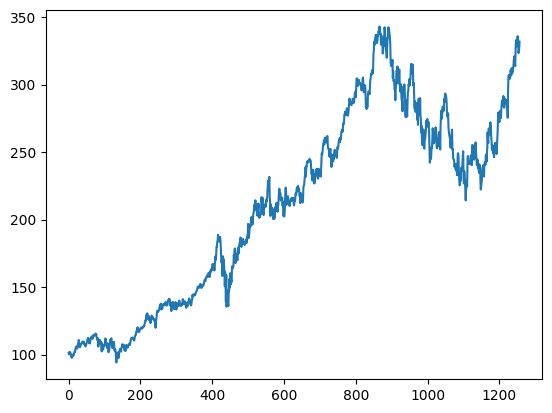

In [18]:
plt.plot(df1)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
print(df1)

[[0.02927946]
 [0.02409832]
 [0.02703028]
 ...
 [0.92830749]
 [0.93445257]
 [0.95477548]]


In [22]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [23]:
training_size,test_size

(817, 440)

In [24]:
train_data

array([[0.02927946],
       [0.02409832],
       [0.02703028],
       [0.02703028],
       [0.03108683],
       [0.02815487],
       [0.02522291],
       [0.01710981],
       [0.01988111],
       [0.01369588],
       [0.01807374],
       [0.01799341],
       [0.02361635],
       [0.01976062],
       [0.02261226],
       [0.0282352 ],
       [0.03100651],
       [0.03209093],
       [0.03152864],
       [0.04040485],
       [0.04538517],
       [0.04329665],
       [0.04747369],
       [0.04414009],
       [0.04124829],
       [0.04875894],
       [0.05558679],
       [0.05434171],
       [0.06707366],
       [0.06221383],
       [0.05442204],
       [0.04514419],
       [0.04799582],
       [0.0487991 ],
       [0.05398024],
       [0.05586794],
       [0.05622942],
       [0.05924171],
       [0.0616917 ],
       [0.06241465],
       [0.05972367],
       [0.05655073],
       [0.06197285],
       [0.05434171],
       [0.05426139],
       [0.0540204 ],
       [0.05116877],
       [0.047

In [25]:
def create_dataset(dataset,time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [26]:
time_step = 100
X_train, Y_train = create_dataset(train_data,time_step)
X_test, Y_test = create_dataset(test_data,time_step)

In [27]:
print(X_train.shape), print(Y_train.shape)

(716, 100)
(716,)


(None, None)

In [28]:
print(X_test.shape), print(Y_test.shape)

(339, 100)
(339,)


(None, None)

In [29]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 182ms/step - loss: 8.0670e-04 - val_loss: 0.0030
Epoch 2/100
12/12 [==============================] - 2s 165ms/step - loss: 8.5065e-04 - val_loss: 0.0036
Epoch 3/100
12/12 [==============================] - 2s 164ms/step - loss: 8.2134e-04 - val_loss: 0.0030
Epoch 4/100
12/12 [==============================] - 2s 174ms/step - loss: 7.7994e-04 - val_loss: 0.0029
Epoch 5/100
12/12 [==============================] - 2s 172ms/step - loss: 7.7441e-04 - val_loss: 0.0027
Epoch 6/100
12/12 [==============================] - 2s 174ms/step - loss: 7.6136e-04 - val_loss: 0.0026
Epoch 7/100
12/12 [==============================] - 3s 214ms/step - loss: 7.7428e-04 - val_loss: 0.0024
Epoch 8/100
12/12 [==============================] - 3s 227ms/step - loss: 7.7061e-04 - val_loss: 0.0025
Epoch 9/100
12/12 [==============================] - 3s 232ms/step - loss: 8.2488e-04 - val_loss: 0.0025
Epoch 10/100
12/12 [==============================] - 3

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [38]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

190.44694842196043

In [42]:
math.sqrt(mean_squared_error(Y_test,test_predict))

273.0530744503948

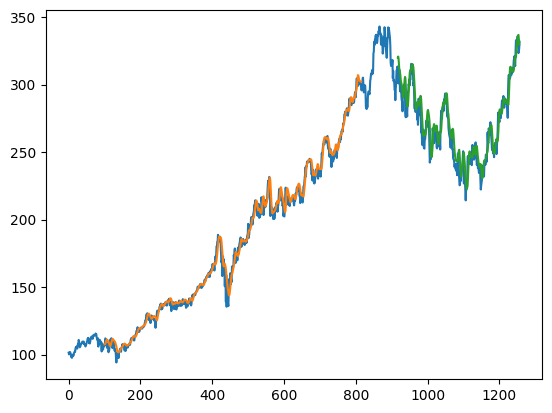

In [43]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [44]:
len(test_data)

440

In [45]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.553458109085067,
 0.5867539561410554,
 0.5962326291268375,
 0.594063780223311,
 0.5883203470158246,
 0.618001445899269,
 0.6186440677966101,
 0.5967547594184271,
 0.6172383323961763,
 0.6370792834765844,
 0.6846734677484136,
 0.6595710498835248,
 0.6532251586472808,
 0.6965619728492247,
 0.6932283717567675,
 0.6807374086271989,
 0.6786488874608403,
 0.7116635874367419,
 0.7150775162663667,
 0.7036308137199774,
 0.6748333199453769,
 0.6584062976945939,
 0.6367579725279138,
 0.6320989637721903,
 0.6451923849305166,
 0.6229014378664952,
 0.6266768415133745,
 0.6237047152381716,
 0.6110530966342678,
 0.6304924090288377,
 0.6472809060968752,
 0.6536267973331191,
 0.6427022250783194,
 0.6408948509920473,
 0.63535223712748,
 0.6203711141457144,
 0.6417784561008915,
 0.6693710338179772,
 0.6880472327094544,
 0.731263555305647,
 0.7442364848582215,
 0.7153184994778696,
 0.721543899108362,
 0.7155594826893728,
 0.737127480118885,
 0.7488151658767772,
 0.7319865049401557,
 0.7273676600530163,


In [48]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.92693615]
101
1 day input [0.58675396 0.59623263 0.59406378 0.58832035 0.61800145 0.61864407
 0.59675476 0.61723833 0.63707928 0.68467347 0.65957105 0.65322516
 0.69656197 0.69322837 0.68073741 0.67864889 0.71166359 0.71507752
 0.70363081 0.67483332 0.6584063  0.63675797 0.63209896 0.64519238
 0.62290144 0.62667684 0.62370472 0.6110531  0.63049241 0.64728091
 0.6536268  0.64270223 0.64089485 0.63535224 0.62037111 0.64177846
 0.66937103 0.68804723 0.73126356 0.74423648 0.7153185  0.7215439
 0.71555948 0.73712748 0.74881517 0.7319865  0.72736766 0.74857418
 0.76279219 0.77986184 0.7755643  0.77536348 0.76395694 0.79311591
 0.7842397  0.7578922  0.76054302 0.78604707 0.77118644 0.78187003
 0.78014298 0.78046429 0.77106595 0.76966021 0.75363483 0.72813077
 0.80825769 0.84625271 0.85601253 0.84918467 0.84858222 0.84452566
 0.84858222 0.86962808 0.86159531 0.85496827 0.87629528 0.86745923
 0.86288055 0.86484858 0.87400594 0.88308298 0.90123705 0.9005141
 0.91192064 0.88814363 0.88248052 0

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [50]:
len(df1)

1257

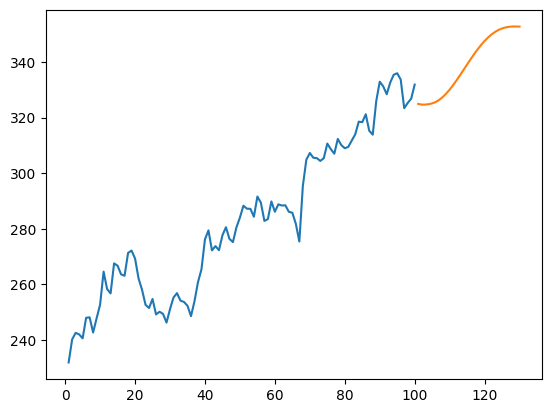

In [52]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

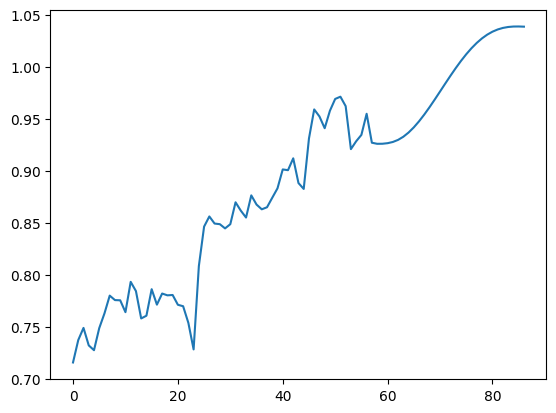

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [54]:
df3=scaler.inverse_transform(df3).tolist()

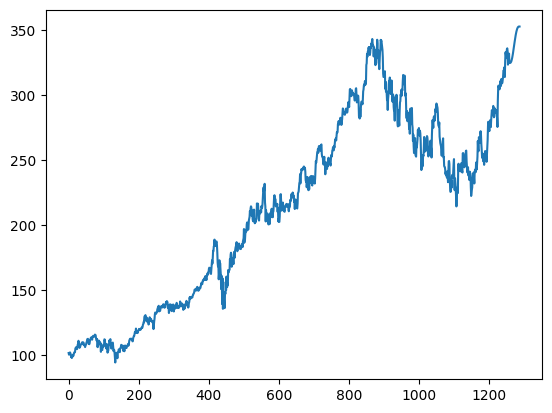

In [55]:
plt.plot(df3)